In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Predicting Prepayment on Loan Data


## The loan data set contains approximately 900,000 rows and 78 feature columns of loan data from 2007 - 2015. 

Background:  This data can be useful in understanding the factors that best influence a borrower's ability to repay their debts





# Question to Explore:  


    
## 1) Can we predict prepayment i.e a borrower that will pay their loan before the term? 

This is important because prepayments deny the lender the interest income they were expecting to earn. Most analyses of loans focuses on delinquencies, but perhaps there is unexplored insight on which borrowers will pay their loans before the term is up.  Lenders can then take these insights into account when setting lending terms and conditions

### Limitations:  

Unclear if there is enough data to support this type of analysis -- how can we define prepayment?

Prepayment = Last Payment - Installment 
This equation reflects that a borrower has paid more than the minimum payment as prescribed by the terms of the loan.  However, the dataset only contains this information on the previous payment, and we cannot calculate the total amount prepaid over the life of the loan, or see how much quicker the loan was actually paid.  


### Hypothesis: 

Higher interest rates and borrowers with high incomes, will lead individuals to prepay their loans.  




In [4]:
loan = pd.read_csv('C:/Users/Shafi Rehman/Documents/GA Data Science/galoanproject/loan.csv')


C:\Users\Shafi Rehman\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loan.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835922,887379,887379,887379,887379,887379,887379,...,887228,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299272,12,6,3,103,10,2,...,63145,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


In [6]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [8]:
items_counts = loan['loan_status'].value_counts()
print items_counts

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


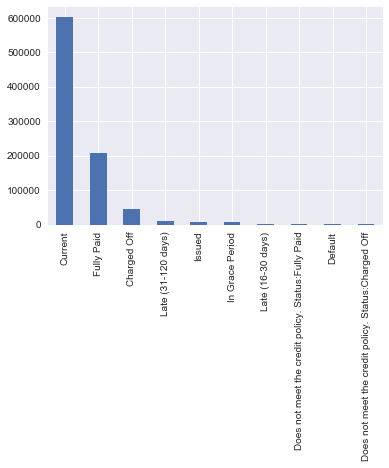

In [9]:
items_counts = loan['loan_status'].value_counts().plot(kind = 'bar')

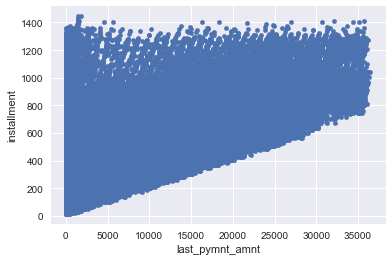

In [10]:
loan.plot(kind='scatter', x='last_pymnt_amnt', y='installment')


In [11]:
x = loan.loc[:, ['last_pymnt_amnt','installment',]]
x.head()

,last_pymnt_amnt,installment
0,171.62,162.87
1,119.66,59.83
2,649.91,84.33
3,357.48,339.31
4,67.79,67.79


In [12]:
## Prepayment is the difference between payment due and how much as actually paid. 
# A positive number means the borrower paid more than the minimum, which we can assume was applied towards the principal
# A positive value for prepayment is 
loan['prepayment'] = loan['last_pymnt_amnt'] - loan['installment']

In [13]:
y = loan.loc[:, ['last_pymnt_amnt','installment','prepayment']]
y.head(5)


,last_pymnt_amnt,installment,prepayment
0,171.62,162.87,8.75
1,119.66,59.83,59.83
2,649.91,84.33,565.58
3,357.48,339.31,18.17
4,67.79,67.79,0.00


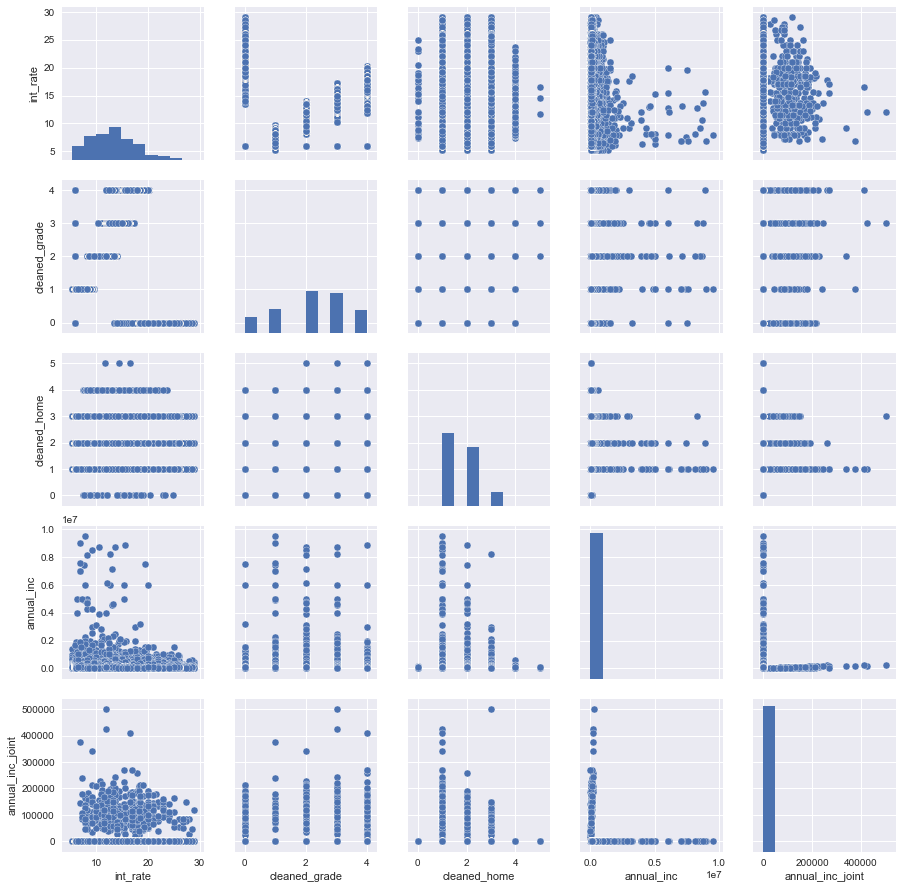

In [81]:
sns.pairplot(loan[['int_rate','cleaned_grade','cleaned_home','annual_inc', 'annual_inc_joint']])

# Data Cleaning


### Our goal is to turn each and every feature into a numerical value that can be easily read by our model. Any cells that also have NaN values will also be filled with zeros

In [16]:
def clean_term (cell):
    return int(cell[:3])

In [17]:
loan["cleaned_term"] = [clean_term(cell) for cell in loan["term"]]

In [18]:
def clean_grade(cell):
    if cell == "A":
        return 1
    elif cell == "B":
        return 2
    elif cell == "C":
        return 3
    elif cell == "D":
        return 4

In [19]:
loan["cleaned_grade"] = [clean_grade(cell) for cell in loan["grade"]]

In [20]:
def clean_emp_length(cell):
    if cell == "10+ years":
        return 10
    if cell == "2 years":
        return 2
    if cell == "< 1 year":
        return 0.5
    if cell == "3 years":
        return 3
    if cell == "1 year":
        return 1
    if cell == "5 years":
        return 5
    if cell == "4 years":
        return 4
    if cell == "n/a":
        return 0
    if cell == "7 years":
        return 7
    if cell == "8 years":
        return 8
    if cell == "6 years":
        return 6
    if cell == "9 years":
        return 9

In [21]:

loan["cleaned_emp_length"] = [clean_emp_length(cell) for cell in loan["emp_length"]]

In [22]:
def clean_home(cell):
    if cell == "NONE":
        return 0
    elif cell == "MORTGAGE":
        return 1
    elif cell == "RENT":
        return 2
    elif cell == "OWN":
        return 3
    elif cell == "OTHER":
        return 4
    elif cell == "ANY":
        return 5

In [23]:
loan["cleaned_home"] = [clean_home(cell) for cell in loan["home_ownership"]]

In [24]:
loan.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [25]:
loan.cleaned_home.value_counts()

1    443557
2    356117
3     87470
4       182
0        50
5         3
Name: cleaned_home, dtype: int64

In [26]:
loan.verification_status.value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [27]:
def clean_vstatus(cell):
    if cell == "Verified":
        return 1
    elif cell == "Not Verified":
        return 2
    elif cell == "Source Verified":
        return 3

In [28]:
loan["cleaned_verification_status"] = [clean_vstatus(cell) for cell in loan["verification_status"]]

In [29]:
loan.issue_d.value_counts().head(2)

Oct-2015    48631
Jul-2015    45962
Name: issue_d, dtype: int64

In [30]:
loan['issue_d'] =  pd.to_datetime(loan['issue_d'])

In [31]:
loan.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [32]:
def clean_loan_status(cell):
    if cell == "Current" or "Fully Paid" or 'Issued' or "In Grace Period" or\
    "Does not meet the credit policy. Status:Fully Paid ":
        return 1
    else: 
        return 0
# A "1" means the account is in good standing, otherwise a "0" indicates that the borrower is either late
# or at various levels of delinquency

In [33]:
loan["cleaned_loan_status"] = [clean_loan_status(cell) for cell in loan["loan_status"]]

In [34]:
loan.pymnt_plan.value_counts()

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [35]:
def clean_pymnt_plan(cell):
    if cell == 'n':
        return 0
    if cell == 'y':
        return 1

In [36]:
loan["cleaned_pymnt_plan"] = [clean_pymnt_plan(cell) for cell in loan["pymnt_plan"]]

In [37]:
loan.purpose.value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [38]:
def clean_purpose(cell):
    if cell == "debt_consolidation":
        return 1
    if cell == "credit_card":
        return 2
    if cell == "home_improvement":
        return 3
    if cell == "other":
        return 0
    if cell == "major_purchase":
        return 4
    if cell == "small_business":
        return 5
    if cell == "car":
        return 6
    if cell == "medical":
        return 7
    if cell == "moving":
        return 8
    if cell == "vacation":
        return 9
    if cell == "house":
        return 10
    if cell == "wedding":
        return 11
    if cell == "renewable_energy":
        return 12
    if cell == "educational":
        return 13

In [39]:
loan["cleaned_purpose"] = [clean_purpose(cell) for cell in loan["purpose"]]

In [40]:
loan['earliest_cr_line'] =  pd.to_datetime(loan['earliest_cr_line'])

In [41]:
loan.initial_list_status.value_counts()            

f    456848
w    430531
Name: initial_list_status, dtype: int64

In [42]:
def clean_initial_list_status(cell):
    if cell == 'f':
        return 1
    elif cell == 'w':
        return 2

In [43]:
loan['cleaned_initial_list_status'] = [clean_initial_list_status(cell) for cell in loan ['initial_list_status']]

In [44]:
loan.mths_since_last_major_derog.fillna(inplace = True, value = 0)

In [45]:
loan.annual_inc_joint.fillna(inplace = True, value = 0)

In [46]:
loan.dti_joint.fillna(inplace = True, value = 0)

In [47]:
loan.verification_status_joint.fillna(inplace = True, value = 0)

In [48]:
loan.open_acc_6m.fillna(inplace = True, value = 0)
loan.open_il_6m.fillna(inplace = True, value = 0)                     
loan.open_il_12m.fillna(inplace = True, value = 0)                    
loan.open_il_24m.fillna(inplace = True, value = 0)                    
loan.mths_since_rcnt_il.fillna(inplace = True, value = 0)

In [49]:
loan.total_bal_il.fillna(inplace = True, value = 0)                   
loan.il_util.fillna(inplace = True, value = 0)                        
loan.open_rv_12m.fillna(inplace = True, value = 0)                    
loan.open_rv_24m.fillna(inplace = True, value = 0)
loan.max_bal_bc.fillna(inplace = True, value = 0)                     
loan.all_util.fillna(inplace = True, value = 0)

In [50]:
loan.inq_fi.fillna(inplace = True, value = 0)
loan.total_cu_tl.fillna(inplace = True, value = 0)
loan.inq_last_12m.fillna(inplace = True, value = 0)
loan.tot_coll_amt.fillna(inplace = True, value = 0)
loan.tot_cur_bal.fillna(inplace = True, value = 0)
loan.delinq_2yrs.fillna(inplace = True, value = 0)
loan.earliest_cr_line.fillna(inplace = True, value = 0)

In [51]:
loan.application_type.value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

In [52]:
def clean_application_type(cell):
    if cell == "INDIVIDUAL":
        return 1
    if cell == "JOINT":
        return 2

In [53]:
loan['cleaned_application-type'] = [clean_application_type(cell) for cell in loan['application_type']]

In [54]:
loan.verification_status_joint.value_counts()      

0                  886868
Not Verified          283
Verified              167
Source Verified        61
Name: verification_status_joint, dtype: int64

In [55]:
def clean_verification_status(cell):
    if cell == "Not Verified":
        return 1
    if cell == "Verified":
        return 2
    if cell == "Source Verified":
        return 3

In [56]:
loan['cleaned_verification_status'] = [clean_verification_status(cell) for cell in loan['verification_status']]

In [57]:
loan.verification_status_joint.value_counts()      

0                  886868
Not Verified          283
Verified              167
Source Verified        61
Name: verification_status_joint, dtype: int64

In [58]:
def clean_verification_status_joint(cell):
    if cell == "Not Verified":
        return 1
    if cell == "Verified":
        return 2
    if cell == "Source Verified":
        return 3

In [59]:
loan['cleaned_verification_status_joint'] = [clean_verification_status_joint(cell) for cell in loan['verification_status_joint']]

In [60]:
loan.total_rev_hi_lim.fillna(value = 0, inplace = True)
loan.mths_since_last_delinq.fillna(value = 0, inplace = True)
loan.mths_since_last_record.fillna(value = 0, inplace = True)
loan.cleaned_verification_status_joint.fillna(value = 0, inplace = True)
loan.cleaned_grade.fillna(value = 0, inplace = True)
loan.annual_inc.fillna(value = 0, inplace = True)
loan.inq_last_6mths.fillna(value = 0, inplace = True)
loan.open_acc.fillna(value = 0, inplace = True)                             
loan.pub_rec.fillna(value = 0, inplace = True)
loan.revol_util.fillna(value = 0, inplace = True)                           
loan.total_acc.fillna(value = 0, inplace = True)
loan.collections_12_mths_ex_med.fillna(value = 0, inplace = True)
loan.acc_now_delinq.fillna(value = 0, inplace = True)

In [61]:
## A prepayment value of 1 means that the borrower did prepay,\
# and a value of zero means that they paid the minimum payment or less

def clean_prepayment(cell):
    if cell > 0:
        return 1
    elif cell <= 0:
        return 0
    

In [62]:
loan['cleaned_prepayment'] = [clean_prepayment(cell) for cell in loan['prepayment']]

## Drop Extraneous Terms

### Here we will drop the feature columns that we have converted into numerical data points.  

In [63]:
loan.drop(['emp_title','term', 'emp_length','home_ownership','sub_grade',\
'loan_status','url','desc','title','next_pymnt_d','last_pymnt_d','last_credit_pull_d',\
'verification_status_joint','application_type','initial_list_status','pymnt_plan','purpose','zip_code',\
'addr_state'], axis = 1, inplace = True)

In [64]:
loan.drop(['grade','verification_status'], axis = 1, inplace = True)

In [65]:

## Shows the newly remaining columns!
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,...,cleaned_emp_length,cleaned_home,cleaned_verification_status,cleaned_loan_status,cleaned_pymnt_plan,cleaned_purpose,cleaned_initial_list_status,cleaned_application-type,cleaned_verification_status_joint,cleaned_prepayment
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,24000.0,2011-12-01,27.65,...,10.0,2,2,1,0,2,1,1,0.0,1
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,30000.0,2011-12-01,1.00,...,0.5,2,3,1,0,6,1,1,0.0,1
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,12252.0,2011-12-01,8.72,...,10.0,2,1,1,0,5,1,1,0.0,1
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,49200.0,2011-12-01,20.00,...,10.0,2,3,1,0,0,1,1,0.0,1
4,1075358,1311748,3000.0,3000.0,3000.0,12.69,67.79,80000.0,2011-12-01,17.94,...,1.0,2,3,1,0,0,1,1,0.0,0


# Clean Dataset

In [66]:
loan.cleaned_prepayment.value_counts()

## There are 220,990 borrowers that paid more than their installment in the last payment. This new column will be our target!

0    666389
1    220990
Name: cleaned_prepayment, dtype: int64

# Model Application

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [68]:
## Sample 1% from the dataframe
sample1 = loan.sample(frac = .05, random_state = 42)

## Specify feature columns:  These are the features that we believe to be most important in predicting prepayment!
feature_cols = ['int_rate', 'cleaned_grade','cleaned_home','annual_inc', 'annual_inc_joint']


## Pull out feature columns from the sample
X = sample1[feature_cols]
## Pull out target column from the sample
y = sample1['cleaned_prepayment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Run KNN Model

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [70]:
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.671774993239


In [71]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.752095916344


### Null Accuracy

### The null predictor only predicts prepayment about 25% of the time

In [72]:
y_train.value_counts()

0    24958
1     8318
Name: cleaned_prepayment, dtype: int64

In [82]:
most_common_class = y_train.value_counts().index[0]
null_prediction = np.full(y_test.shape, most_common_class)

print(metrics.accuracy_score(y_test, null_prediction))

0.751532636134


# Tuning Model

In [74]:
X_validation, X_holdout, y_validation, y_holdout = train_test_split(X, y,\
random_state = 42)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_validation, y_validation,\
                                                    random_state=42)
print X_train.shape[0] + X_test.shape[0]
print X_validation.shape[0]
print X_holdout.shape[0]

33276
33276
11093


In [76]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
k_range = range(1, 101)
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate and fit the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)
    


In [77]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training_error': training_error, 'testing_error': testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)

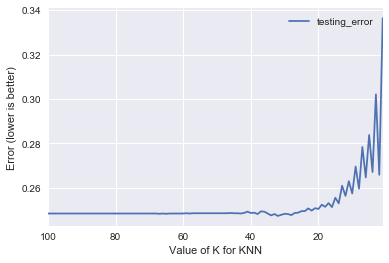

In [78]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing_error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');


,testing_error,training_error
K,,
32,0.247386,0.249669
34,0.247626,0.249750
28,0.247746,0.249469


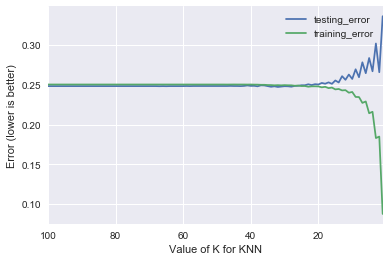

In [79]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

# Lowest testing_errors
df.sort_values('testing_error').head(3)

In [80]:
## Based on the graph above, the optimal K is around 17 

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.746844572665


# Conclusions

## Using a KNN Classification model, we are able to predict prepayment approximately in 75% of the cases we see  of borrowers 

## Lenders can use these factors to better optimize the terms of their loans to individuals at risk of paying less interest over the life of the loan

# Further Study

### May be useful to scale some of our data using a lasso or log function

### Also may be useful in predicting prepayment using other features in the dataset, including zip code 
